In [1]:
# Importing the libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

# Loading the dataset Iris which classifies the types of flowers
Iris = datasets.load_iris()

# Initializing independant variables and separating it from label
Iris_Data = Iris.data

# Initializing labels as target on what we will be predicting the classification of flowers
Iris_Labels = Iris.target

Iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
#Setting seed to randomly select the sample data from the dataset
np.random.seed(42)

# Initializing the sample size
indices = np.random.permutation(len(Iris_Data))
TrainSampleSize = 12

# Creating a Train Dataset to train our model
Train_Iris_Data = Iris_Data[indices[:-TrainSampleSize]]
Train_Iris_Labels = Iris_Labels[indices[:-TrainSampleSize]]

# Creating a Test Dataset to test our model accuracy and prediction
Test_Iris_Data = Iris_Data[indices[-TrainSampleSize:]]
Test_Iris_Labels = Iris_Labels[indices[-TrainSampleSize:]]

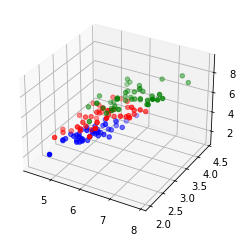

In [3]:
# Plotting the three different Species or Categories of flowers in Iris Dataset which is our Target as well to see their distribution.

X = []
for iclass in range (3):
    X.append([[],[],[]])
    for i in range(len(Train_Iris_Data)):
        if Train_Iris_Labels[i] == iclass:
            X[iclass][0].append(Train_Iris_Data[i][0])
            X[iclass][1].append(Train_Iris_Data[i][1])
            X[iclass][2].append(sum(Train_Iris_Data[i][2:]))
            
colours = ("b", "r", "g")

plot = plt.figure()
ax = plot.add_subplot(111, projection = '3d')

for iclass in range (3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c = colours[iclass])

plt.show()


In [4]:
# Calculating the KNN or the K nearest neighbour distance

def distance(point1, point2):
    
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    return np.linalg.norm(point1 - point2)


In [5]:
# Building KNN Model to correctly calculate the distance and predict the random datapoint how it can be classified as

def get_neighbor(training_set, labels, test_instance, k, distance = distance):
    
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key = lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)

In [6]:
# Determine which are the closest datapoints to the test value which is getting predicted

def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [7]:
# Display vote and the labels for the sample data points and see the accuracy of the model

for i in range(TrainSampleSize):
    neighbors = get_neighbor(Train_Iris_Data, Train_Iris_Labels, Test_Iris_Data[i], 3, distance = distance)
    
    print("index: ", i,
         ", result of vote: ", vote(neighbors),
         ", label: ", Test_Iris_Labels[i],
         ", data: ", Test_Iris_Data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]
